In [1]:
import cadquery as cq
from cadquery import exporters
from jupyter_cadquery.cadquery import (PartGroup, Part, Edges, Faces, Vertices, show, 
                                       replay, enable_replay, disable_replay, reset_replay)
from jupyter_cadquery import set_sidecar, set_defaults

from math import sin, radians, sqrt

import ipywidgets as widgets

Overwriting auto display for cadquery Workplane and Shape


In [2]:
set_defaults(axes=True, grid=True, axes0=True, timeit=False, cad_width=640, height=800)

set_sidecar("Z", init=True)
replay_box = widgets.Checkbox(False, description='Enable Replay')
out = widgets.Output()
display(replay_box)
display(out)

@out.capture()
def changed(e):
    if e["new"]:
        enable_replay(warning=False)
    else:
        disable_replay()

replay_box.observe(changed, names='value')

Checkbox(value=False, description='Enable Replay')

Output()

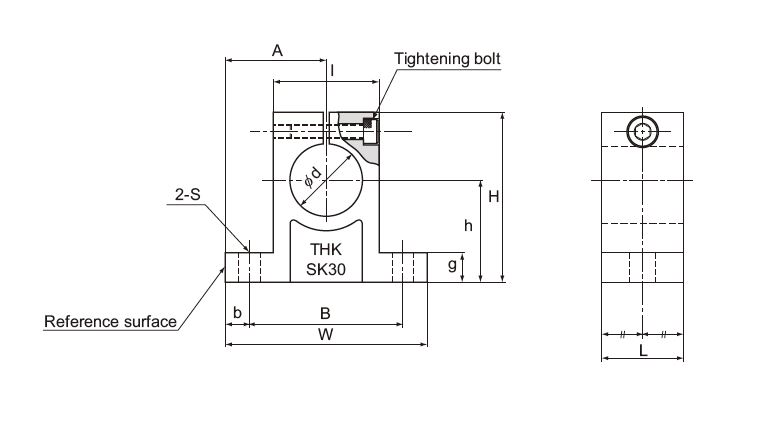

<table class="col-xs-12 col-md-8"><tbody>		<tr>			<td rowspan="4">Model No.</td>			<td colspan="13">Main dimensions</td>			<td rowspan="3">Mass</td>		</tr>		<tr>			<td rowspan="2">H</td>			<td rowspan="2">W</td>			<td rowspan="2">L</td>			<td rowspan="2">B</td>			<td rowspan="2">S</td>			<td rowspan="3">Mounting<br>bolt<br>model No.</td>			<td rowspan="2">h<br>±0.02</td>			<td rowspan="2">A<br>±0.05</td>			<td rowspan="2">b</td>			<td rowspan="2">g</td>			<td rowspan="2">I</td>			<td rowspan="2">Shaft<br>diameter<br>d</td>			<td rowspan="3">Mounting<br>bolt<br>model No.</td>		</tr>		<tr>		</tr><tr>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>mm</td>			<td>g</td>		</tr>		<tr><td>SK10</td><td>32.8</td><td>42 </td><td>14 </td><td>32 </td><td>5.5</td><td>M5 </td><td>20 </td><td>21 </td><td>5 	</td><td>6 		</td><td>18 </td><td>10 </td><td>M4 </td><td>24	</td></tr>		<tr><td>SK12</td><td>37.5</td><td>42 </td><td>14 </td><td>32 </td><td>5.5</td><td>M5 </td><td>23 </td><td>21 </td><td>5 	</td><td>6 		</td><td>20 </td><td>12 </td><td>M4 </td><td>30	</td></tr>		<tr><td>SK13</td><td>37.5</td><td>42 </td><td>14 </td><td>32 </td><td>5.5</td><td>M5 </td><td>23 </td><td>21 </td><td>5 	</td><td>6 		</td><td>20 </td><td>13 </td><td>M4 </td><td>30	</td></tr>		<tr><td>SK16</td><td>44 </td><td>48 </td><td>16 </td><td>38 </td><td>5.5</td><td>M5 </td><td>27 </td><td>24 </td><td>5 	</td><td>8 		</td><td>25 </td><td>16 </td><td>M4 </td><td>40	</td></tr>		<tr><td>SK20</td><td>51 </td><td>60 </td><td>20 </td><td>45 </td><td>6.6</td><td>M6 </td><td>31 </td><td>30 </td><td>7.5</td><td>10 	</td><td>30 </td><td>20 </td><td>M5 </td><td>70	</td></tr>		<tr><td>SK25</td><td>60 </td><td>70 </td><td>24 </td><td>56 </td><td>6.6</td><td>M6 </td><td>35 </td><td>35 </td><td>7 	</td><td>12 	</td><td>38 </td><td>25 </td><td>M6 </td><td>130</td></tr>		<tr><td>SK30</td><td>70 </td><td>84 </td><td>28 </td><td>64 </td><td>9 	</td><td>M8 </td><td>42 </td><td>42 </td><td>10	</td><td>12 	</td><td>44 </td><td>30 </td><td>M6 </td><td>180</td></tr>		<tr><td>SK35</td><td>83 </td><td>98 </td><td>32 </td><td>74 </td><td>11 </td><td>M10 </td><td>50 </td><td>49 </td><td>12	</td><td>15 	</td><td>50 </td><td>35 </td><td>M8 </td><td>270</td></tr>		<tr><td>SK40</td><td>96 </td><td>114 </td><td>36 </td><td>90 </td><td>11 </td><td>M10</td><td>60 </td><td>57 </td><td>12	</td><td>15 	</td><td>60 </td><td>40 </td><td>M8 </td><td>420</td></tr>	</tbody>	</table>

In [3]:
# SK12
linear_rod_support_h = 23

In [75]:
height = 25

linear_rod_spacing = 99
linear_rod_d = 12
linear_rod_bearing_d = 21

screw_r = 8.2/2

# 608ZZ
bearing_d = 22
bearing_h = 7-1.5 # 1.5: flange thickness
bearing_y_offset = 1

m5_d = 5
m5_head_d = 8.5+0.2

aluminum_profile = 20

min_thickness = 4

In [76]:
support_y = bearing_d/2+min_thickness+bearing_y_offset+linear_rod_support_h+aluminum_profile
support_x = bearing_d+min_thickness*2
support_z = bearing_h

mount_hole_x_offset = support_x/2-min_thickness-m5_r

body = (
    cq.Workplane("XY")
    .box(support_x, support_y, support_z)
    .faces(">Z")
    .workplane()
    .move(0, -support_y/2)
    .rect(support_x, aluminum_profile, centered=(True,False))
    .extrude(height-support_z)
    .edges()
    .chamfer(1)
    .faces(">Z")
    .workplane()
    .move(0, support_y/2-min_thickness-bearing_d/2)
    .hole(bearing_d)
    .faces(">Z")
    .workplane(centerOption="CenterOfMass")
    .pushPoints([(-mount_hole_x_offset, 0), (mount_hole_x_offset, 0)])
    .hole(m5_d)
    .faces(">Z")
    .workplane(offset=-4)
    .pushPoints([(-mount_hole_x_offset, 0), (mount_hole_x_offset, 0)])
    .hole(m5_head_d)
)

replay(body)

Use the multi select box below to select one or more steps you want to examine


In [77]:
exporters.export(body, '/tmp/x.stl')